In [1]:
from keras.models import load_model
import cv2
import numpy as np


In [3]:
model = load_model('result.model')
face_clsfr = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
labels_dict= {1:"Mask",0:"No Mask"}
color_dict = {1:(0,255,0),0:(0,0,255)}

source = cv2.VideoCapture(0)

while(True):
    ret,img = source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        face_img = gray[y:y+h,x:x+w]
        resize = cv2.resize(face_img,(100,100))
        normalized = resize/255.0
        reshape = np.reshape(normalized,(1,100,100,1))
        result = model.predict(reshape)
        
        label = np.argmax(result,axis=1)[0]
       
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        acc=round(np.max(result,axis=1)[0]*100,2)
        cv2.putText(img,str(acc),(x+150,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow("Live",img)
    key = cv2.waitKey(1)
    if key==27:
        break
        
cv2.destroyAllWindows()
source.release()

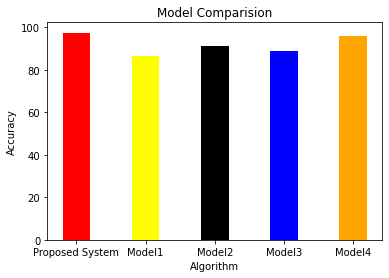

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {"Proposed System" : 97.38,"Model1":86.6,"Model2":91.2,"Model3":88.7,"Model4":96}
Algorithm = list(data.keys())
Accuracy = list(data.values())

c = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(Algorithm, Accuracy, color = c,
        width = 0.4)
 
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Model Comparision")
plt.show()